In [145]:
## import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


In [75]:
## load the data set
pd.set_option('display.max_columns', None)
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [77]:
# checking the missing values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [78]:
#Shape of the data
data.shape

(8124, 23)

In [79]:
data.select_dtypes('object').nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [80]:
# Use value_counts method on "class" column of data object
classes = data['class'].value_counts()

# Print the result
classes

class
e    4208
p    3916
Name: count, dtype: int64

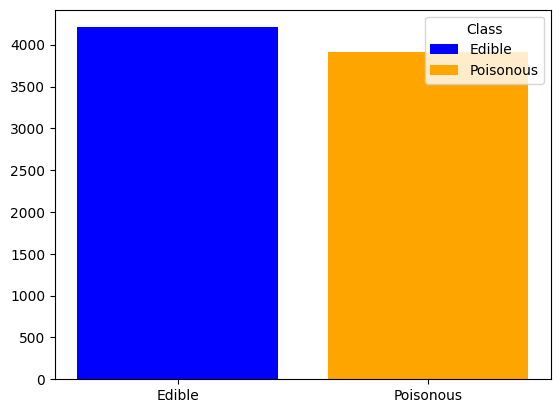

In [81]:
# Add the bar for the "Edible" class
plt.bar('Edible', classes['e'], color= 'blue')

# Add the bar for the "Poisonous" class
plt.bar('Poisonous', classes['p'], color= 'orange')

# Display the plot
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

In [82]:
def plot_col(data, col, color=['red', 'blue'], labels=None, hue=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(x=col, palette=color, data=data, hue=hue)
    ax.set(title=f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")


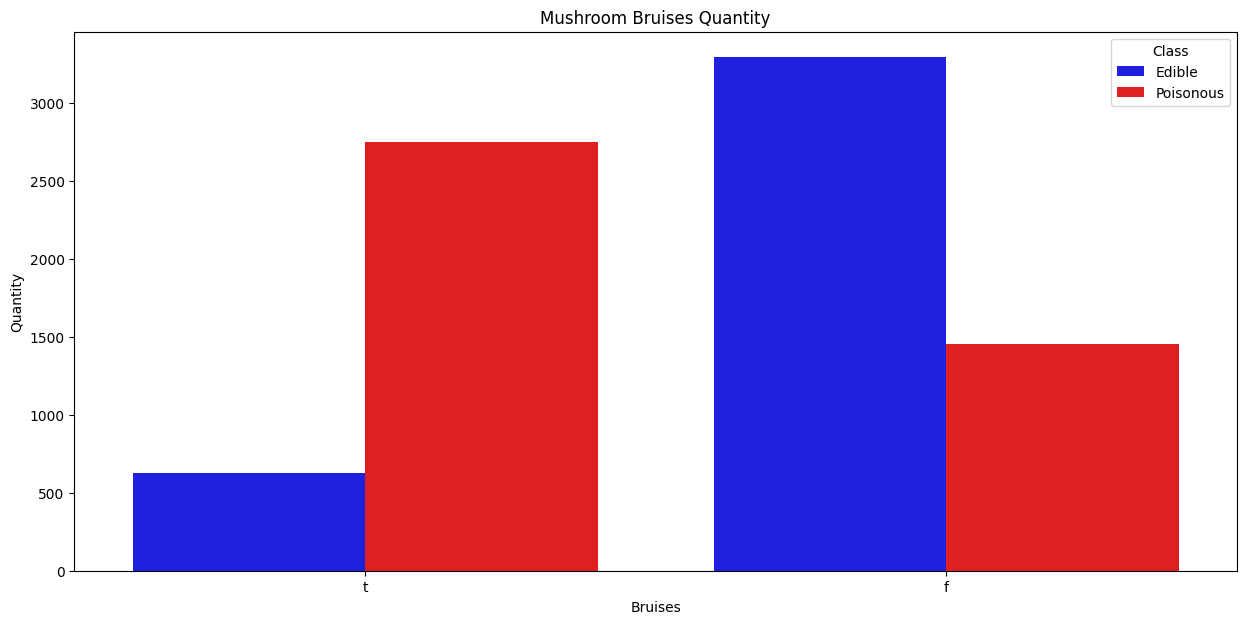

In [83]:
##Bar plot
bruises_labels = ['bruises', 'no_bruises']
plot_col(data=data, col='bruises', color=['blue', 'red'], labels=bruises_labels, hue='class')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

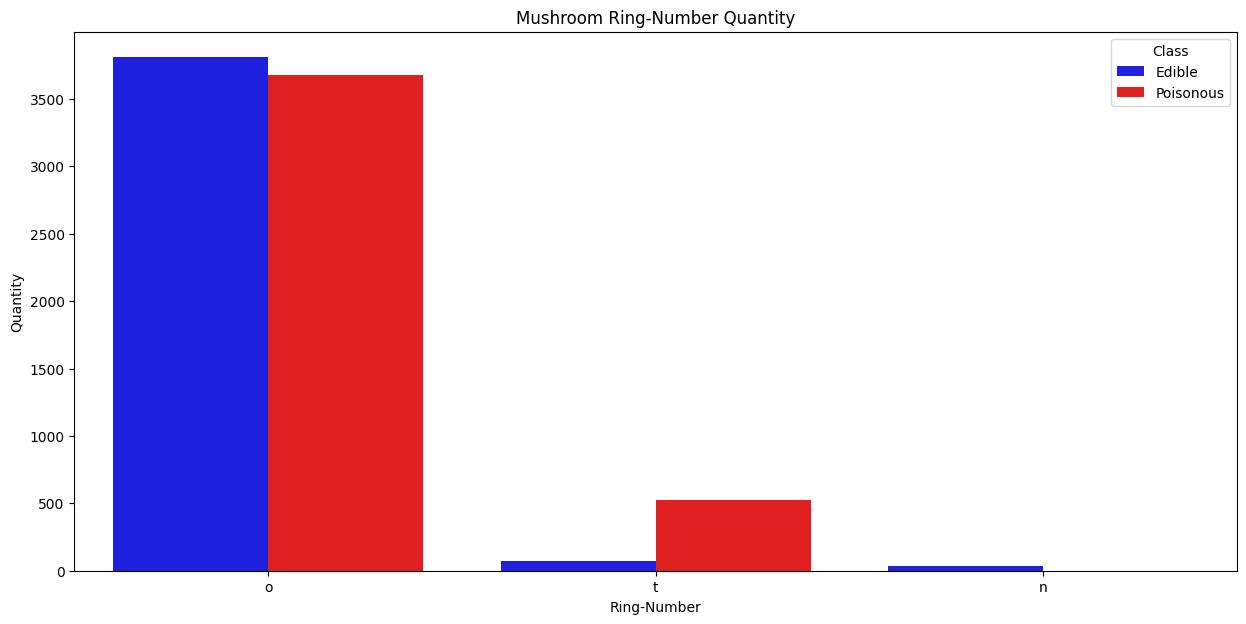

In [84]:
## bar plot
ring_numbers = ['n', 'o', 't']  # Assuming these are the unique values in 'ring-number'

plot_col(data=data, col='ring-number', color=['blue', 'red'], labels=ring_numbers, hue='class')

plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

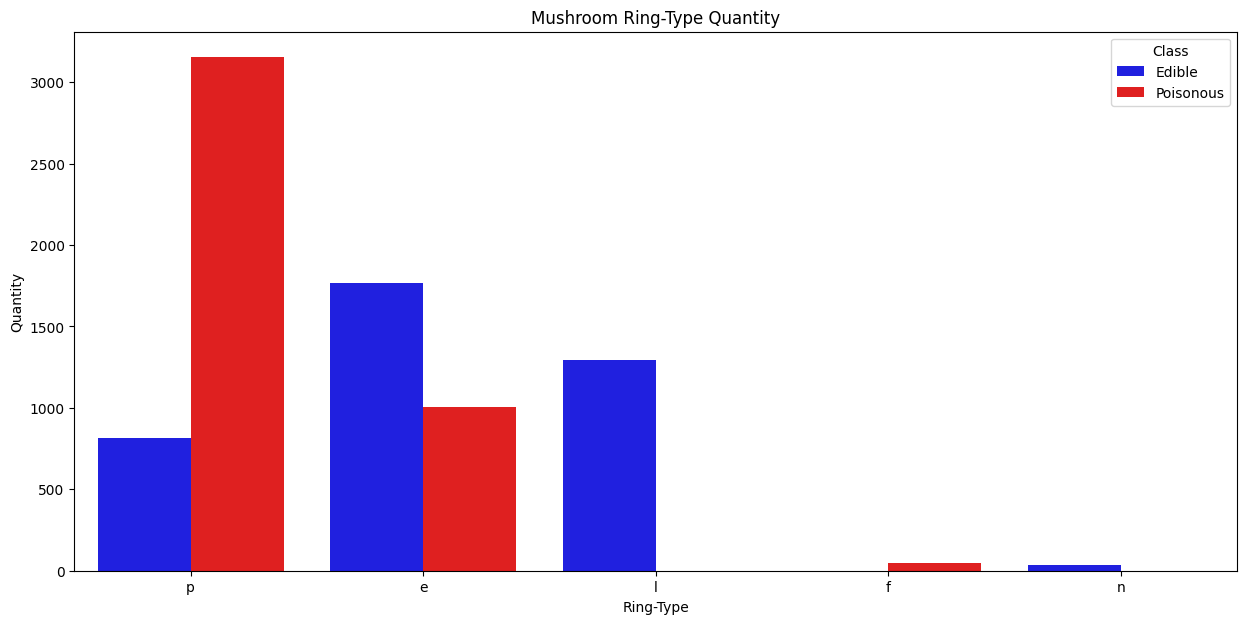

In [85]:
## Bar plot
ring_type_labels = ['evanescent', 'flaring', 'large', 'none', 'pendant']

plot_col(data=data,col='ring-type', color=['blue', 'red'], labels=ring_type_labels, hue='class')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

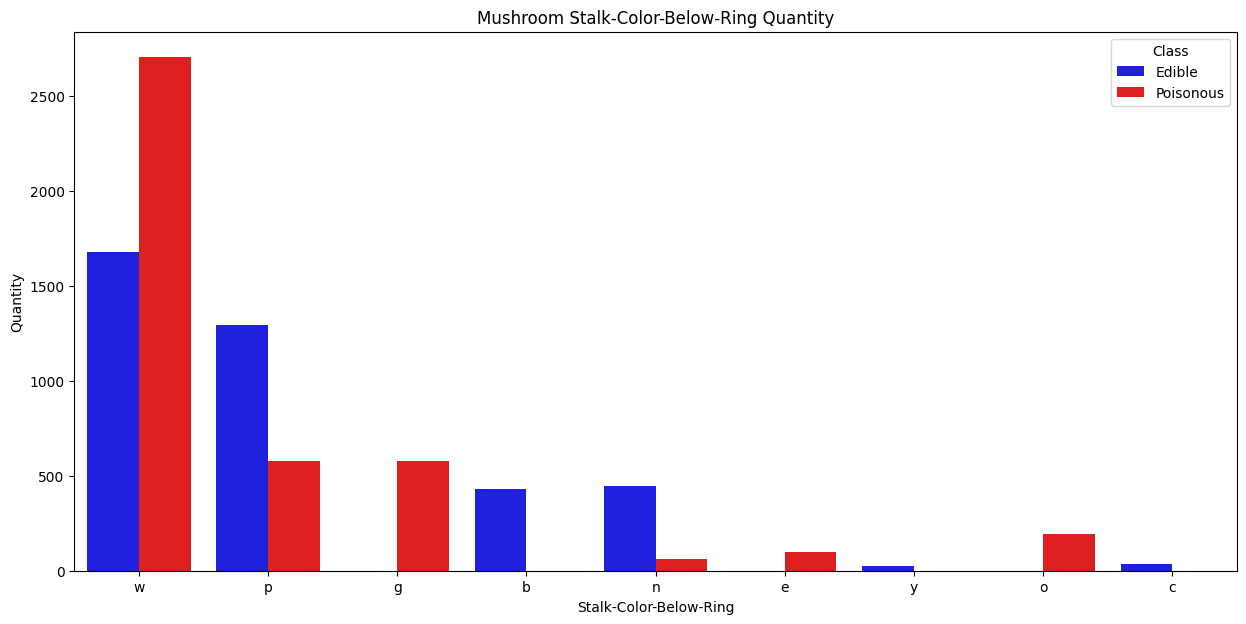

In [86]:
## bar plot
stalk_colors_below_ring = ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow']

plot_col(data=data, col='stalk-color-below-ring', color=['blue', 'red'], labels=stalk_colors_below_ring, hue='class')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

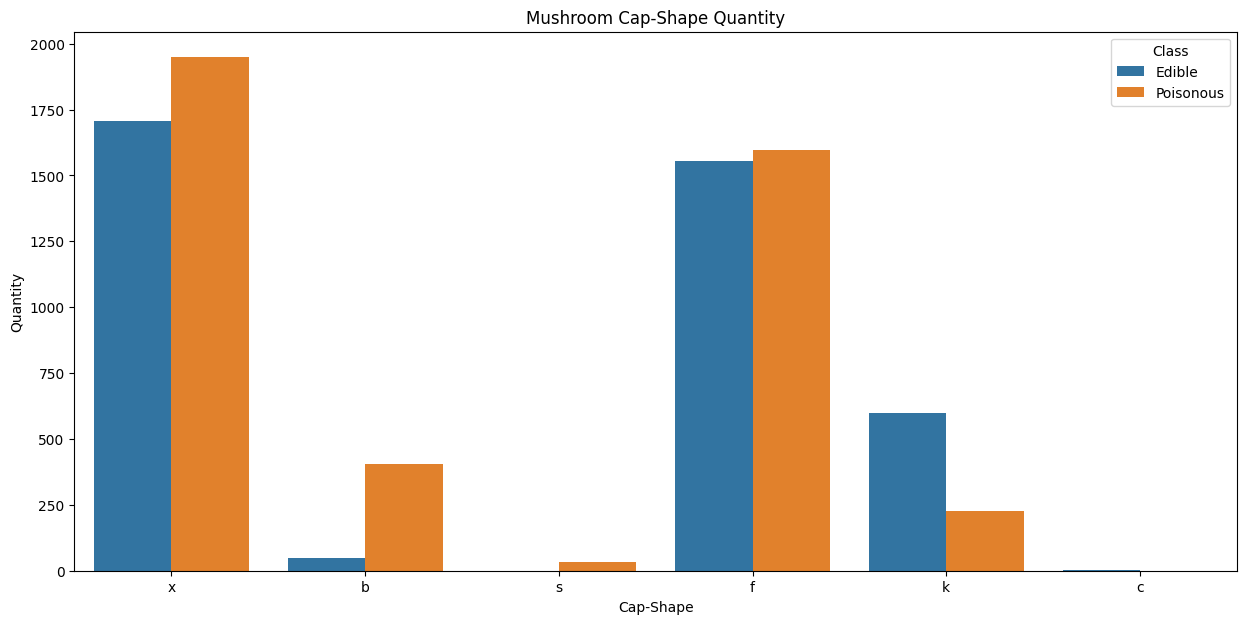

In [87]:
## bar plot
def plot_col(data, col, hue, labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(x=col, data=data, hue=hue)
    ax.set(title=f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")

labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(data=data, col='cap-shape', hue='class')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

C:\Users\Arani C\AppData\Local\Temp\ipykernel_72300\120403812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, palette=color_dict.keys(), data=data, hue=hue)


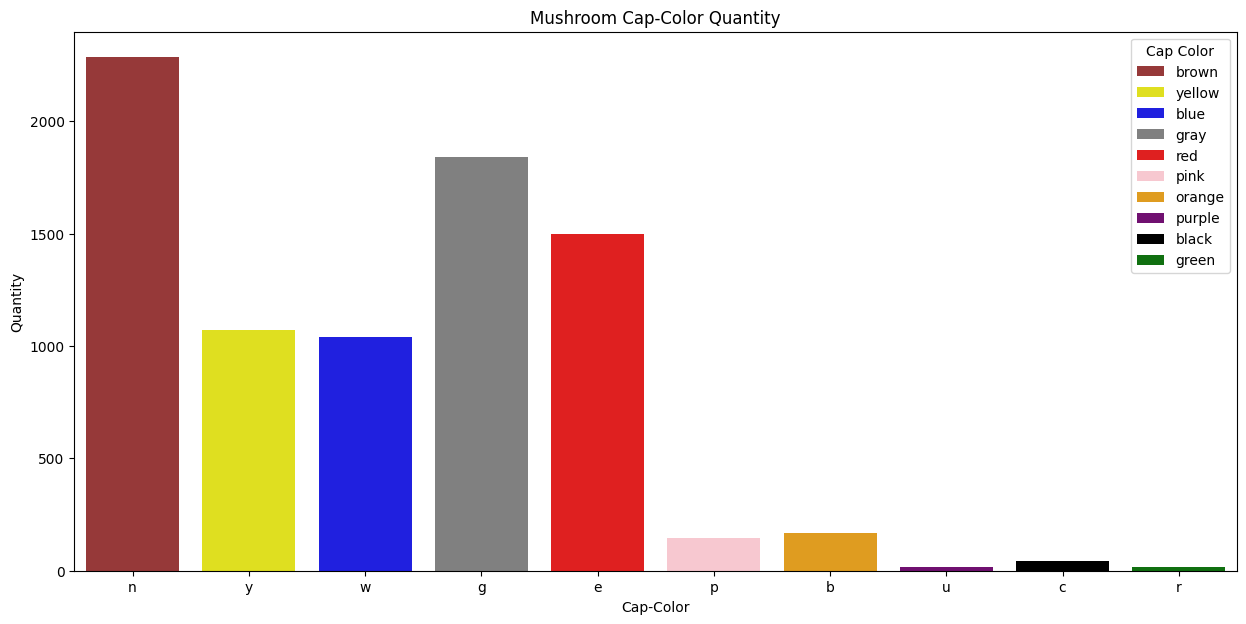

In [88]:
## bar plot
def plot_col(data, col, color_dict, labels=None, hue=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(x=col, palette=color_dict.keys(), data=data, hue=hue)
    ax.set(title=f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")

# Example usage:
color_dict = {"brown": "n", "yellow": "y", "blue": "w", "gray": "g", "red": "e", "pink": "p", "orange": "b", "purple": "u", "black": "c", "green": "r"}
cap_color = list(color_dict.keys())
plot_col(data=data, col='cap-color', color_dict=color_dict, labels=cap_color)
plt.legend(title='Cap Color', labels=cap_color)
plt.show()

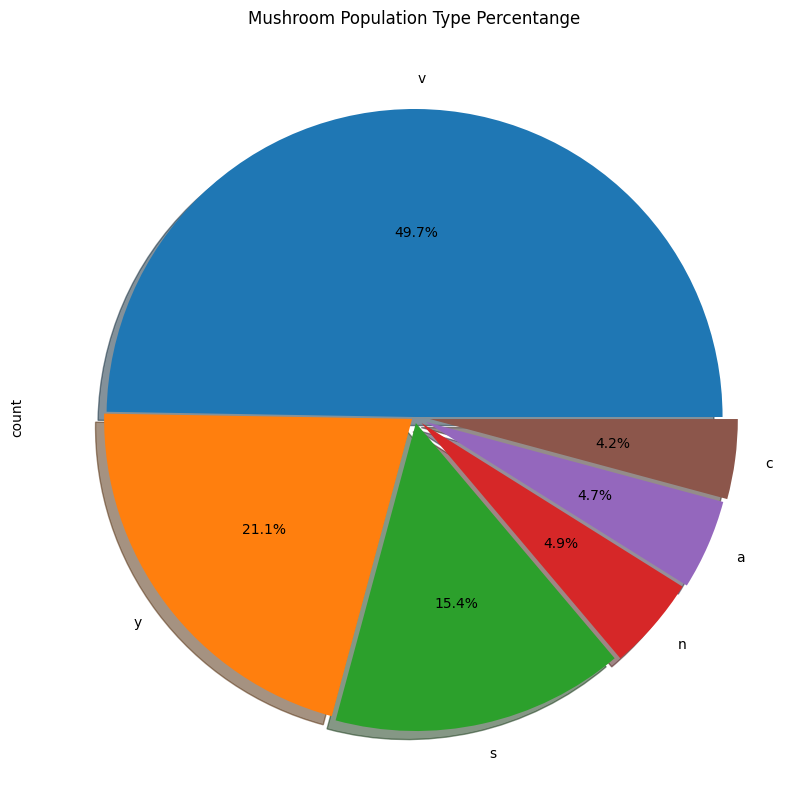

In [89]:
## Pie chart
fig, ax = plt.subplots(figsize=(15, 10))
order = list(data['population'].value_counts().index)

explode = (0.0,0.01,0.02,0.03,0.04,0.05)
data['population'].value_counts().plot.pie(explode=explode , autopct='%1.1f%%', labels=order, shadow=True, ax=ax)
ax.set_title('Mushroom Population Type Percentange');

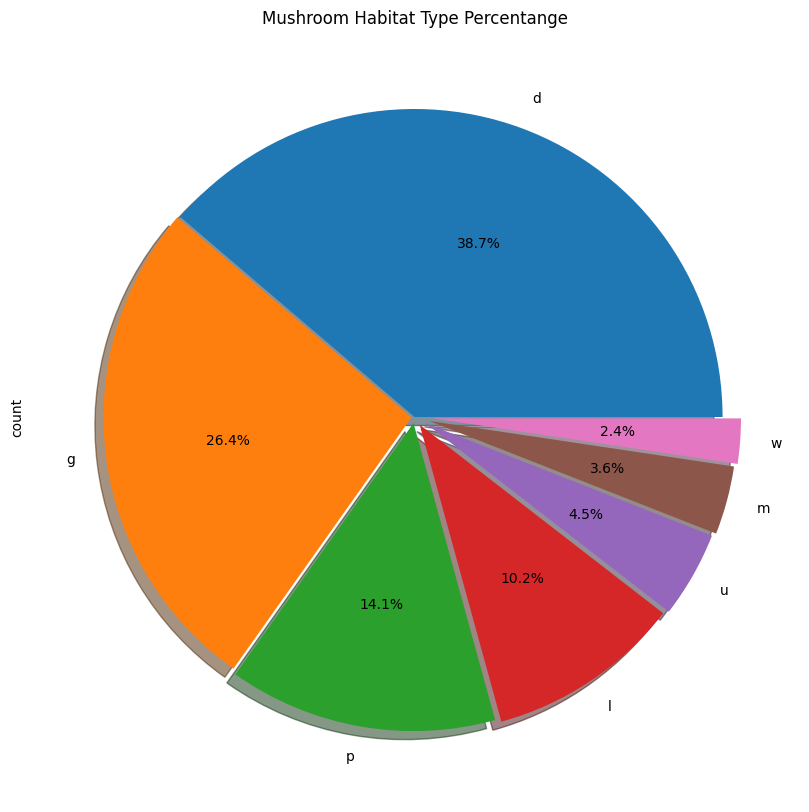

In [90]:
## Pie Chart
fig, ax = plt.subplots(figsize=(15, 10))
order1 = list(data['habitat'].value_counts().index)
explode = (0.0,0.01,0.02,0.03,0.04,0.05,0.06)
data['habitat'].value_counts().plot.pie(explode=explode , autopct='%1.1f%%', labels=order1, shadow=True, ax=ax)
ax.set_title('Mushroom Habitat Type Percentange');

In [91]:
## LabelEncoder
le = LabelEncoder()
for columns in data.columns:
    data[columns] = le.fit_transform(data[columns])

In [92]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [93]:
##statistical Analysis
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [94]:
## Exploratory data analysis
## correlation matrix
corr_mat = data.corr(numeric_only=True)
corr_mat


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

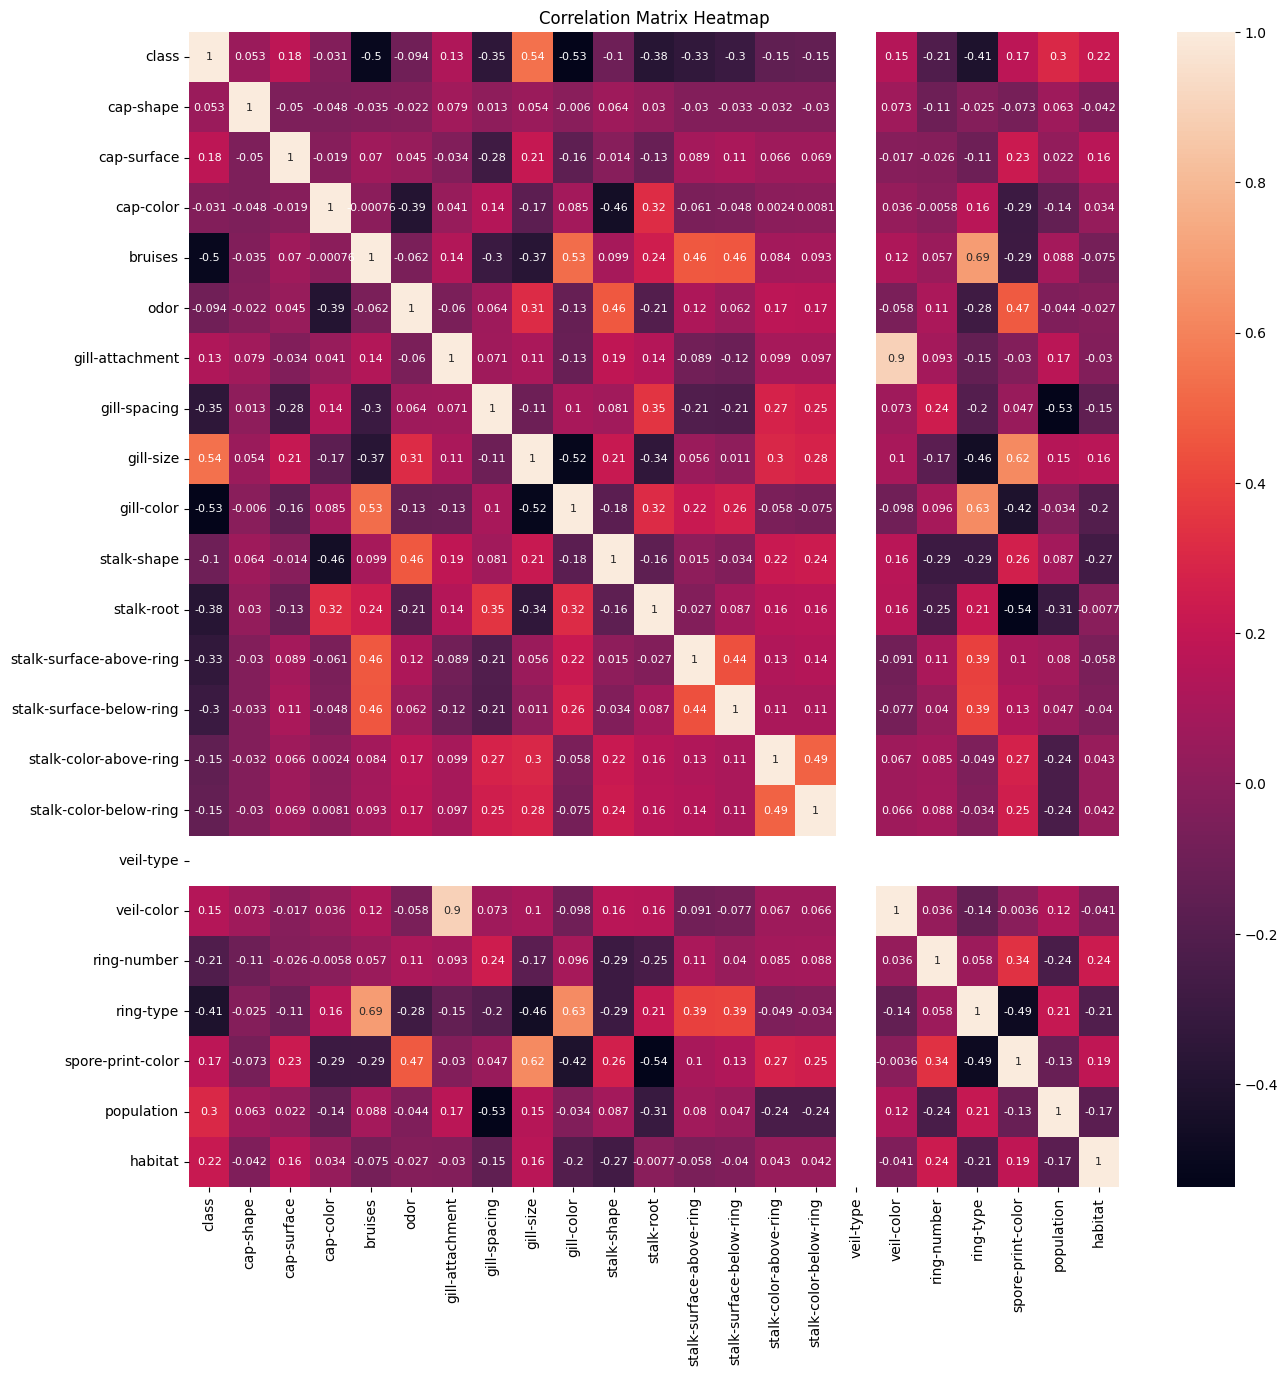

In [95]:
## plot the heat map
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, annot=True, annot_kws={'size': 8})
plt.title("Correlation Matrix Heatmap", loc="center")

In [96]:
##Use value_counts method on "class" column of data object
classes = data['class'].value_counts()

In [97]:
# Print the result
classes

class
0    4208
1    3916
Name: count, dtype: int64

In [98]:
# splitting the data into independant and dependant variables
X = data.drop(["class"], axis = 1)
y = data["class"]

In [99]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [100]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [101]:
## Split the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=32)

In [102]:
## standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
##LOGISTIC REGRESSION MODEL

In [104]:
## Train the model
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [105]:
## Make predictions
y_pred_LR = model_LR.predict(X_test)

In [106]:
# Create a dataframe with the prediction
pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred_LR})

,Actual,Predicted
6506,1,1
5656,1,1
4908,1,1
1384,0,0
3305,0,0
...,...,...
3602,0,0
1169,0,0
3650,0,0
2828,0,0


In [107]:
## Model evaluation 
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(accuracy_LR)

0.9606153846153846


In [108]:
## Confusion matrix
conf_mat_LR = confusion_matrix(y_test, y_pred_LR)
print(conf_mat_LR)

[[816  30]
 [ 34 745]]


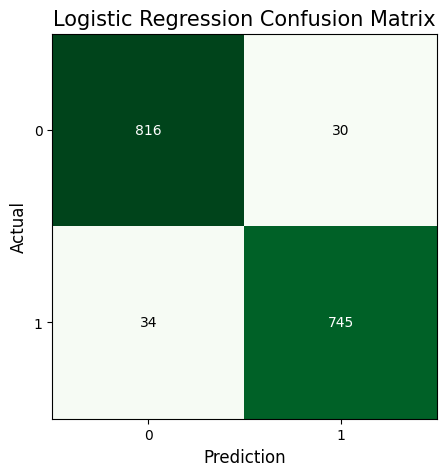

In [109]:
## Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_LR, figsize=(5,5), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Logistic Regression Confusion Matrix', fontsize = 15)
plt.show()

In [110]:
auc_LR = roc_auc_score(y_test, y_pred_LR)
print('AUC: ',auc_LR)

AUC:  0.9604466537386539


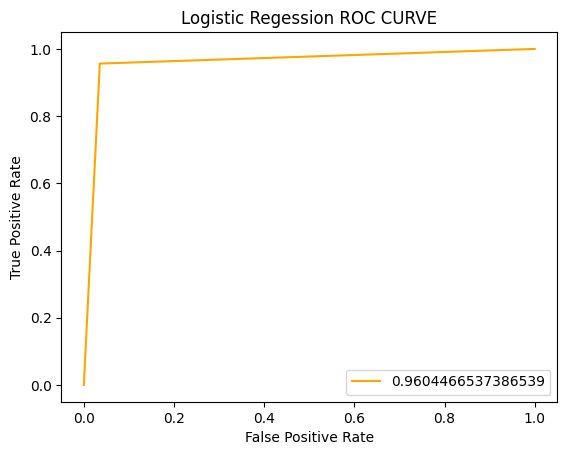

In [111]:
#False positive & true positive rate
# Underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, y_pred_LR)
plt.plot(fpr, tpr, color = 'orange', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regession ROC CURVE')
plt.legend()
plt.show()

In [112]:
## Classification report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       846
           1       0.96      0.96      0.96       779

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [113]:
## NAIVE BAYES MODEL

In [114]:
## Create our Naive Bayes model
model_NB = GaussianNB()
## using  training data for fitting
model_NB.fit(X_train, y_train)

GaussianNB()

In [115]:
## Using test data to make prediction
y_pred_NB = model_NB.predict(X_test)

In [116]:
## Putting it in a dataframe

pd.DataFrame({'actual': y_test, 'Predicted': y_pred_NB})

,actual,Predicted
6506,1,1
5656,1,1
4908,1,1
1384,0,0
3305,0,1
...,...,...
3602,0,0
1169,0,0
3650,0,0
2828,0,0


In [117]:
## Model evaluation
accuracy_NB = accuracy_score(y_test, y_pred_NB )

## Confusion matrix
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.9187692307692308
[[768  78]
 [ 54 725]]


In [118]:
## Classification report
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       846
           1       0.90      0.93      0.92       779

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



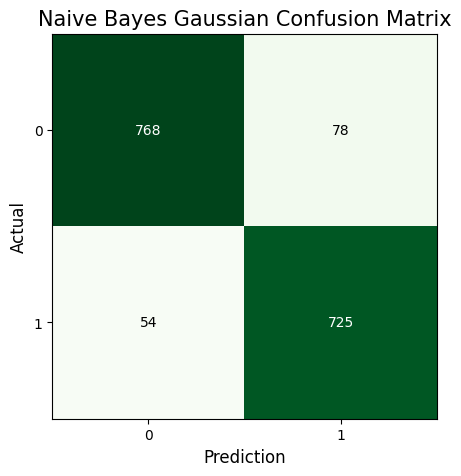

In [119]:
# Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_NB, figsize=(5,5), cmap=plt.cm.Greens)

plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Naive Bayes Gaussian Confusion Matrix', fontsize=15)
plt.show()

In [120]:
auc_NB = roc_auc_score(y_test, y_pred_NB)
print('AUC: ',auc_NB)

AUC:  0.9192408889374448


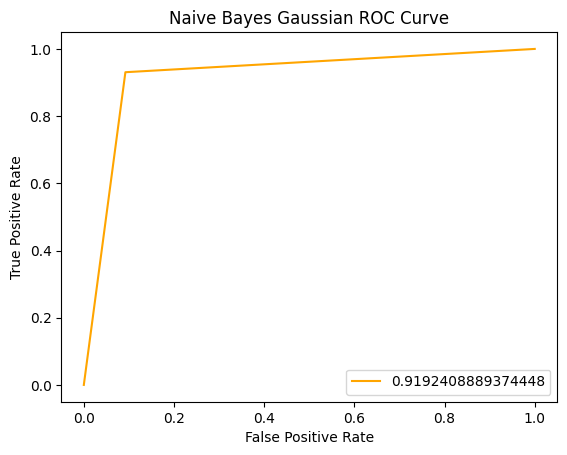

In [121]:
#false positive & true positive rate
# underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, y_pred_NB)
plt.plot(fpr, tpr, color = 'orange', label = auc_NB)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Gaussian ROC Curve')
plt.legend()
plt.show()

In [122]:
## RANDOM FOREST MODEL

In [123]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [124]:
## Make predictions
y_pred_RF = RF_model.predict(X_test)

In [125]:
## Put the predictions in a dataframe
RF_model_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_RF})
RF_model_output

,Actual,Predicted
6506,1,1
5656,1,1
4908,1,1
1384,0,0
3305,0,0
...,...,...
3602,0,0
1169,0,0
3650,0,0
2828,0,0


In [126]:
## Evaluating model accuracy
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(accuracy_RF)

1.0


In [127]:
## Confusion matrix
conf_mat_RF = confusion_matrix(y_test, y_pred_RF)
print(conf_mat_RF)

[[846   0]
 [  0 779]]


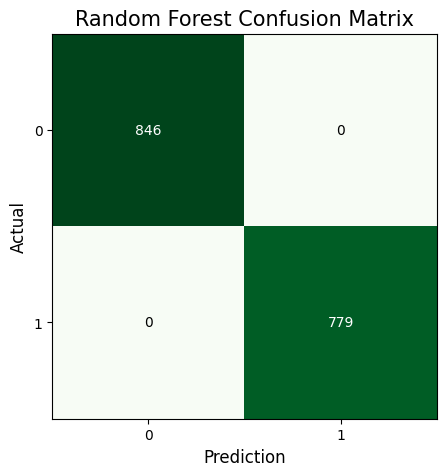

In [128]:
## Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_RF, figsize=(5,5), cmap=plt.cm.Greens)

plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Random Forest Confusion Matrix', fontsize=15)
plt.show()

In [129]:
auc_RF = roc_auc_score(y_test, y_pred_RF)
print('AUC: ',auc_RF)

AUC:  1.0


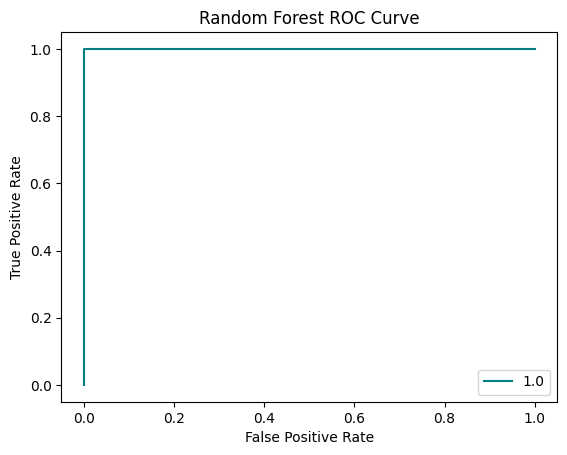

In [130]:
# false positive & true positive rate
# underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, y_pred_RF)
plt.plot(fpr, tpr, color = 'teal', label = auc_RF)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

In [131]:
## Classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [132]:
## SUPPORT VECTOR MACHINE (SVM) Model

In [133]:
## create a SVM Classifier
clfLinear = svm.SVC(kernel ='linear')
clfsigmoid = svm.SVC(kernel ='sigmoid')
clfrbf = svm.SVC(kernel ='rbf')

In [134]:
## fit the model
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [135]:
## make the prediction for test dadaset 
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [136]:
## model evaluation
## Calculate the accuracy of our model
print('Accurancy(Linear Kernel):', metrics.accuracy_score(y_test,y_pred_linear))
print('Accurancy(Sigmoid Kernel):', metrics.accuracy_score(y_test,y_pred_sigmoid))
print('Accurancy(RBF Kernel):', metrics.accuracy_score(y_test,y_pred_rbf))

Accurancy(Linear Kernel): 0.9833846153846154
Accurancy(Sigmoid Kernel): 0.8184615384615385
Accurancy(RBF Kernel): 1.0


In [137]:
## Confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[832  14]
 [ 13 766]]
[[683 163]
 [132 647]]
[[846   0]
 [  0 779]]


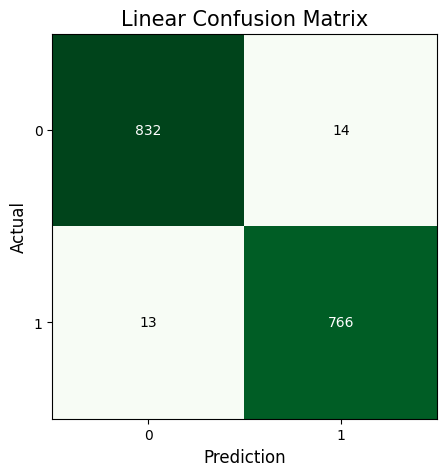

In [155]:
## Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_linear, figsize=(5,5), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Linear Confusion Matrix', fontsize = 15)
plt.show()

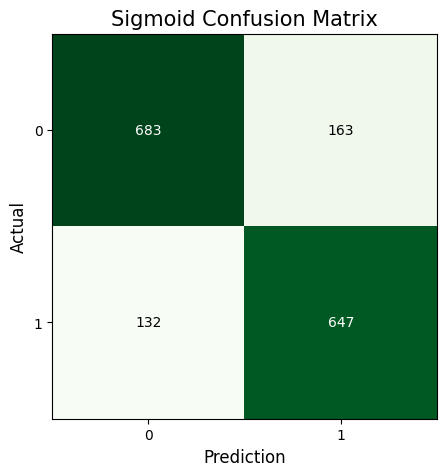

In [139]:
## Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_sigmoid, figsize=(5,5), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Sigmoid Confusion Matrix', fontsize = 15)
plt.show()

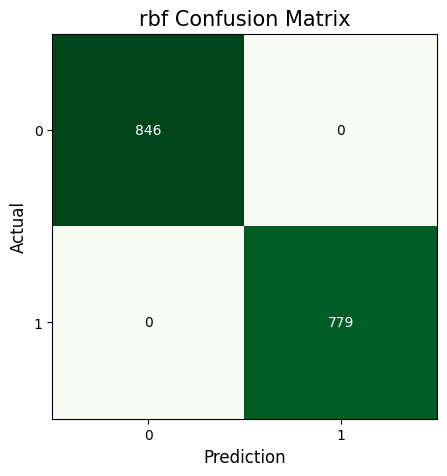

In [140]:
## Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_rbf, figsize=(5,5), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('rbf Confusion Matrix', fontsize = 15)
plt.show()

In [141]:
## classification report
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       846
           1       0.98      0.98      0.98       779

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [142]:
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       846
           1       0.80      0.83      0.81       779

    accuracy                           0.82      1625
   macro avg       0.82      0.82      0.82      1625
weighted avg       0.82      0.82      0.82      1625



In [143]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [146]:
## Decision tree
## create a decision tree with criterion gini with no max depth
decision_tree_gini = DecisionTreeClassifier()

## entropy criterion with no max depth
decision_tree_entropy = DecisionTreeClassifier(criterion = 'entropy')

## max depth of 3
decision_tree_depth = DecisionTreeClassifier(max_depth=3)

In [147]:
## fit our model
decision_tree_gini.fit(X_train, y_train)
decision_tree_entropy.fit(X_train, y_train)
decision_tree_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [148]:
## make prediction

y_pred_gini = decision_tree_gini.predict(X_test)
y_pred_entropy = decision_tree_entropy.predict(X_test)
y_pred_depth = decision_tree_depth.predict(X_test)

In [150]:
## model evaluation
print('Accurancy(gini):', metrics.accuracy_score(y_test,y_pred_gini))
print('Accurancy(entropy):', metrics.accuracy_score(y_test,y_pred_entropy))
print('Accurancy(depth):', metrics.accuracy_score(y_test,y_pred_depth))

Accurancy(gini): 1.0
Accurancy(entropy): 1.0
Accurancy(depth): 0.9649230769230769


In [151]:
## Confussion matrix 
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)
conf_mat_depth = confusion_matrix(y_test, y_pred_depth)

print(conf_mat_gini)
print(conf_mat_entropy)
print(conf_mat_depth)

[[846   0]
 [  0 779]]
[[846   0]
 [  0 779]]
[[806  40]
 [ 17 762]]


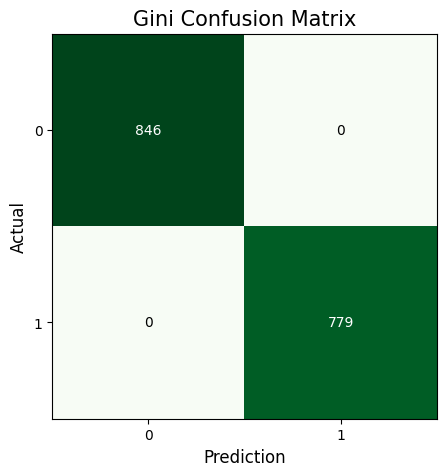

In [153]:
## Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_gini, figsize=(5,5), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Gini Confusion Matrix', fontsize = 15)
plt.show()

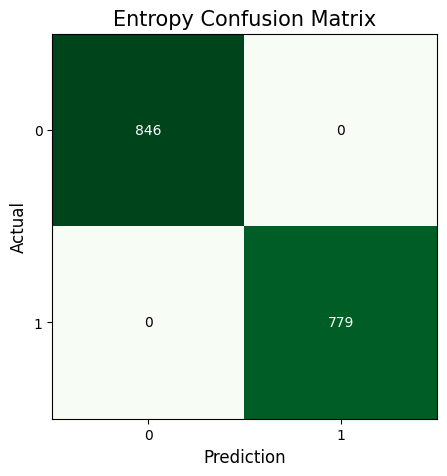

In [154]:
## Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_entropy, figsize=(5,5), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Entropy Confusion Matrix', fontsize = 15)
plt.show()

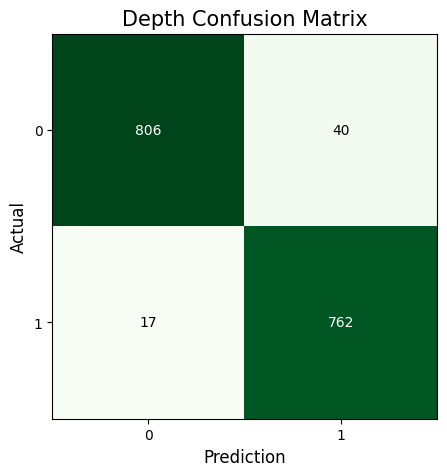

In [156]:
## Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_depth, figsize=(5,5), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Depth Confusion Matrix', fontsize = 15)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
print(classification_report(y_test, y_pred_depth))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       846
           1       0.95      0.98      0.96       779

    accuracy                           0.96      1625
   macro avg       0.96      0.97      0.96      1625
weighted avg       0.97      0.96      0.96      1625



In [160]:
##Knn

In [161]:
##knn
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [162]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
##
print('Accurancy:', metrics.accuracy_score(y_test,y_pred_knn))

Accurancy: 1.0


In [163]:
pd.DataFrame({'Actual':y_test, 'predicted':y_pred_knn})

,Actual,predicted
6506,1,1
5656,1,1
4908,1,1
1384,0,0
3305,0,0
...,...,...
3602,0,0
1169,0,0
3650,0,0
2828,0,0


In [164]:
## Confusion matrix
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_mat_knn)

[[846   0]
 [  0 779]]


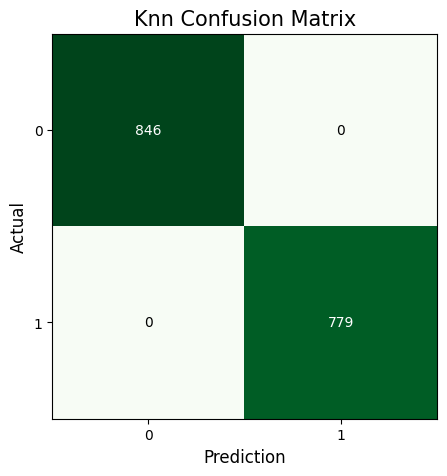

In [165]:
## Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_knn, figsize=(5,5), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Knn Confusion Matrix', fontsize = 15)
plt.show()

In [166]:
auc_LR = roc_auc_score(y_test, y_pred_knn)
print('AUC: ',auc_LR)

AUC:  1.0


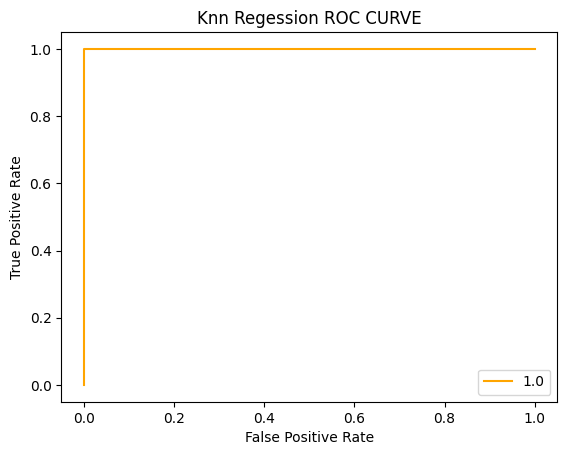

In [167]:
#False positive & true positive rate
# Underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr, color = 'orange', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn Regession ROC CURVE')
plt.legend()
plt.show()

In [168]:
## Classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

